In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')
ecommerce_sales

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card


In [42]:
# Know the shape of the dataset
def get_dataset_shape(dataset):
    """
    Function to determine the shape of the dataset
    Should return a tuple containing the rows and columns of the dataset
    """

    return dataset.shape

ecommerce_sales = get_dataset_shape(ecommerce_sales)
ecommerce_sales


(51290, 16)

In [43]:
# Display/show the dataset info : columns, column name and the dtype

def get_dataset_info(dataset):
    """
    Function to obtain information about a given dataset.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to get information about.
    
    Returns:
    - None: Prints the information about the dataset.
    """
    dataset_info = dataset.info()
    print(dataset_info)

# Load the dataset
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')

# Call the function to get information about the dataset
get_dataset_info(ecommerce_sales)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

In [44]:
# We get to know the stanadard deviation mean which will help us in data cleaning: missing values 
def get_dataset_statistics_describe(dataset):
    """
    Function to obtain information about a given dataset.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to get information about.
    
    Returns:
    - None: Prints the information about the dataset.
    """
    dataset_describe = dataset.describe()
    print(dataset_describe)

 # Load the dataset
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')
   
# Call the function to get information about the dataset
get_dataset_statistics_describe(ecommerce_sales)


              Aging   Customer_Id         Sales      Quantity      Discount  \
count  51289.000000  51290.000000  51289.000000  51288.000000  51289.000000   
mean       5.255035  58155.758764    152.340872      2.502983      0.303821   
std        2.959948  26032.215826     66.495419      1.511859      0.131027   
min        1.000000  10000.000000     33.000000      1.000000      0.100000   
25%        3.000000  35831.250000     85.000000      1.000000      0.200000   
50%        5.000000  61018.000000    133.000000      2.000000      0.300000   
75%        8.000000  80736.250000    218.000000      4.000000      0.400000   
max       10.500000  99999.000000    250.000000      5.000000      0.500000   

             Profit  Shipping_Cost  
count  51290.000000   51289.000000  
mean      70.407226       7.041557  
std       48.729488       4.871745  
min        0.500000       0.100000  
25%       24.900000       2.500000  
50%       59.900000       6.000000  
75%      118.400000      11.8

### Data Cleaning 

In [45]:
import pandas as pd

def identify_duplicates(dataset):
    """
    Function to identify duplicate values in a given dataset.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to check for duplicates.
    
    Returns:
    - pandas.DataFrame: A DataFrame containing the duplicate rows from the dataset.
    """
    duplicates = dataset[dataset.duplicated(keep=False)]
    return duplicates

# Call the function to identify duplicate values
duplicate_rows = identify_duplicates(ecommerce_sales)

# Load the dataset
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')


# Print the duplicate rows
# duplicate_rows


In [46]:
#Identifying missing values 
def identify_missing_values(dataset):
    """
    Function to identify missing values in a given dataset.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to check for missing values.
    
    Returns:
    - pandas.DataFrame: A DataFrame containing the columns with missing values and their corresponding count.
    """
    missing_values = dataset.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values.sort_values(ascending=False)
    return missing_values

# Call the function to identify missing values
missing_values = identify_missing_values(ecommerce_sales)

# Load the dataset
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')


# Print the columns with missing values and their count
print(missing_values)


Order_Priority    2
Quantity          2
Shipping_Cost     1
Discount          1
Sales             1
Aging             1
dtype: int64


In [47]:
# Fill the missing values with mean

def fill_missing_with_mean(dataset):
    """
    Function to fill missing values in a given dataset with the mean of respective columns.
    
    Args:
    - dataset (pandas.DataFrame): The dataset to fill missing values.
    
    Returns:
    - pandas.DataFrame: A new DataFrame with missing values filled with the mean of respective columns.
    """
    dataset.fillna(dataset.mean(), inplace = True )


# Load the dataset
ecommerce_sales = pd.read_csv(r'C:\Users\wanji\OneDrive\Desktop\Ecommerce sales\archive (5)\E-commerce Dataset.csv')


# Call the function to fill missing values with the mean
fill_missing_with_mean(ecommerce_sales)

# Print the filled dataset
#print(ecommerce_sales)


In [48]:
missing_values = ecommerce_sales.isnull().sum()

# Print the count of missing values
print(missing_values)

Order_Date             0
Time                   0
Aging                  0
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping_Cost          0
Order_Priority         2
Payment_method         0
dtype: int64


## Co-relation Matrix

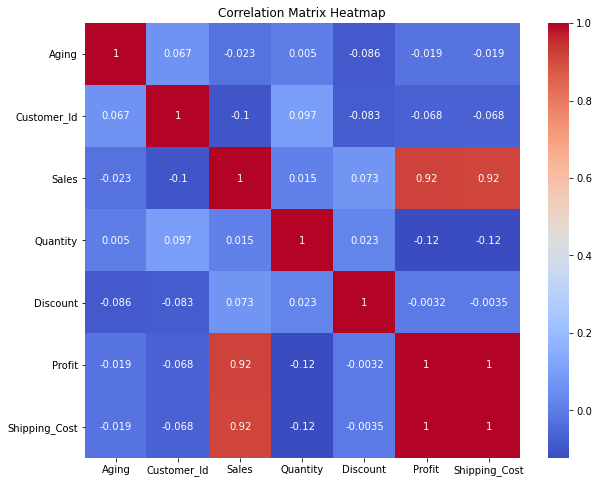

In [49]:
# Compute the correlation matrix
correlation_matrix = ecommerce_sales.corr()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, ax=ax)

# Set the title
ax.set_title('Correlation Matrix Heatmap')

plt.show()

### Transform the data 

In [50]:
# Transform the data 
# Date type conversions
ecommerce_sales['Sales'] = ecommerce_sales['Sales'].astype(float)
# Aggregate : Group by the column and calculate the sum
sales_by_category = ecommerce_sales.groupby('Product_Category')['Sales'].sum()
# Get the mean of the sales
average_sales = ecommerce_sales['Sales'].mean()
# Create a new Column based on the column available
ecommerce_sales['Revenue'] = ecommerce_sales['Sales'] * ecommerce_sales['Quantity']
# Normalize by the min-max scaling
ecommerce_sales['Normalized_Sales'] = (ecommerce_sales['Sales'] - ecommerce_sales['Sales'].min()) / (ecommerce_sales['Sales'].max() - ecommerce_sales['Sales'].min())
# Standardize using the z-score normalization
ecommerce_sales['Standardized_Sales'] = (ecommerce_sales['Sales'] - ecommerce_sales['Sales'].mean()) / ecommerce_sales['Sales'].std()
